# Single Objective Optimization (SLSQP)

In [1]:
from wpaf_opt import *
import time

# ============================================================================ #
#                       Single Objective Optimization                          #
# ============================================================================ #

start_time = time.time()
args = {}
# x0 = [27.74269661,	41.77910928,	30.74200375,	7.949304467]
# args['x0'] = x0
x_init, p_init, x, soo_res_best, p_best, op_obj = wpaf_single_opt(args_in = args)

print('Execution time:', time.time() - start_time, 'seconds')

wpaf_init_obj = WPAF(x_init.nom0, x_init.name, p_init.nom_dict)
wpaf_opt_obj = WPAF(soo_res_best.x, x.name, p_best) 

#TODO: check all costs to be in 2023 $
#TODO: Update lifetime to 10 or 15 years

#print_init_result(wpaf_init_obj)
print_soo_optimize_result(wpaf_opt_obj, x.list, x.unit, soo_res_best)

/Users/gabriel/Documents/SEA Lab/aquaculture/wpaf_opt.py:156: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate("linear")
/Users/gabriel/Documents/SEA Lab/aquaculture/gis_handler.py:73: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.points = pd.concat([self.points, pd.DataFrame([conditions])], ignore_index=True)


Execution time: 69.58612990379333 seconds
optimization success:  True
optimal design variable:
   capture_width      66.100 [m]
   pen_diameter       44.565 [m]
   stock_density       6.460 [kg/m^3]
----------------------------------------
optimal objective function terms:
   Objective_func             9.891
   cost per yield             9.891 [$ / kg]
   NPV                      266.911 [Million $]
   levelized fish yield      26.984 [kilo Tonne]
   annual fish yield          2.963 [kilo Tonne]
----------------------------------------
optimal wave energy converter:
   wec number         20.656 [-]
   wec_P_ave          18.033 [kW]
   wec AEP        3265174.306 [kWh]
----------------------------------------
optimal price break down WPAF:
   WPAF NPV                       266.911 [Million $] 100.0 [%]
   |__ wec NPV                    129.460 [Million $]  48.5 [%]
   |   |__ wec CapEx              106.230 [Million $]  39.8 [%]
   |   |__ wec OpEx                23.230 [Million $]   8.7 

# Plot Objective Function and Constraints (Convergence Results)

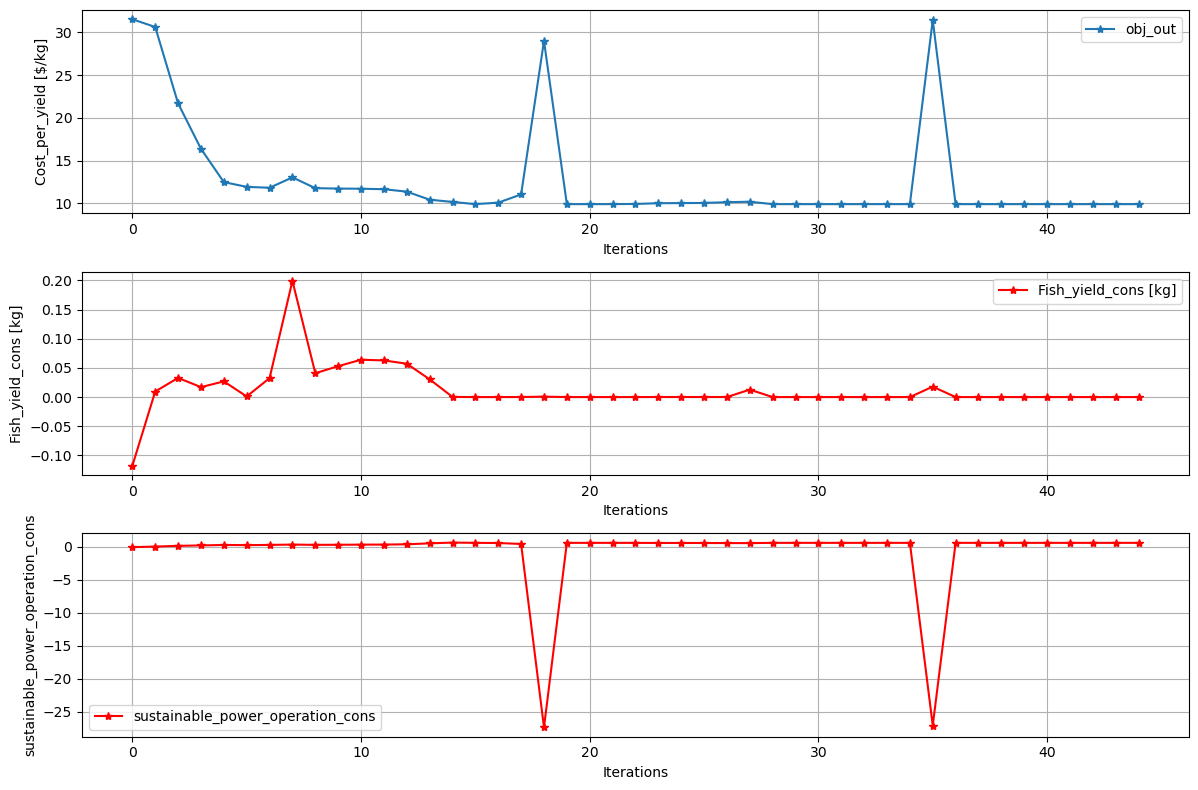

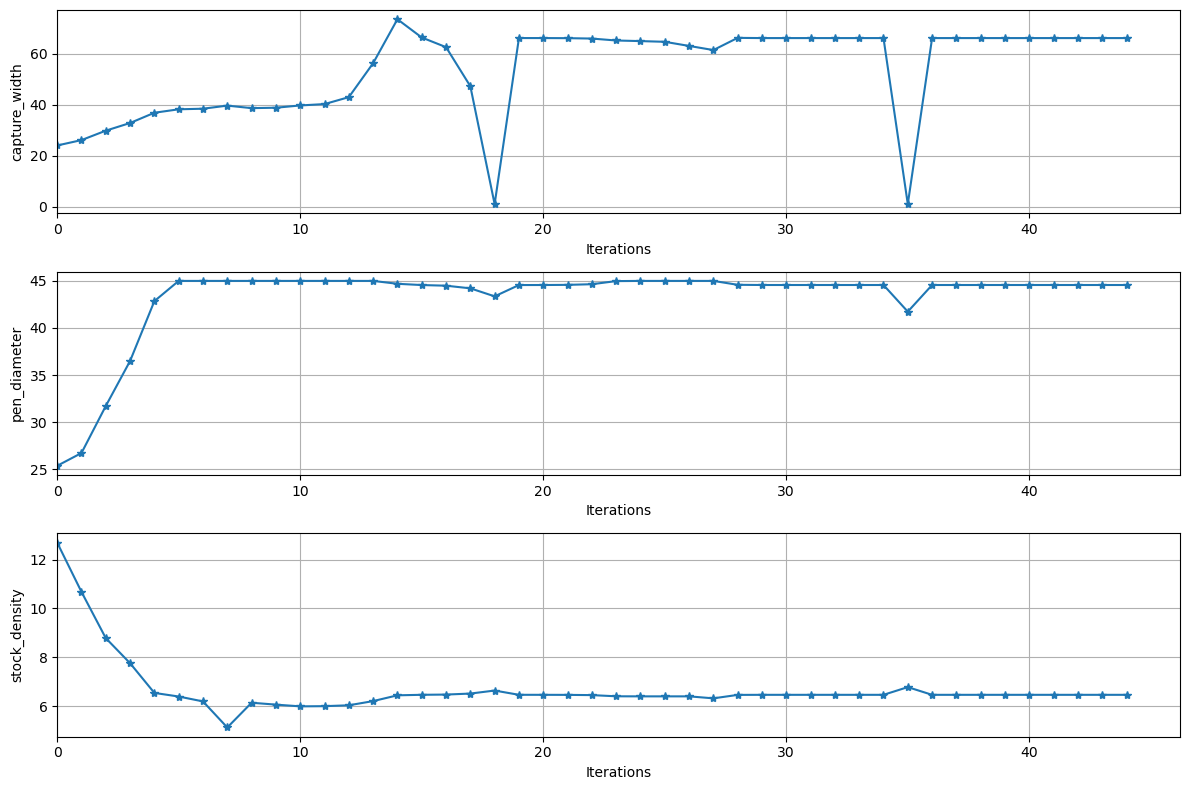

In [2]:
from matplotlib import pyplot as plt

cons_title = ['Fish_yield_cons [kg]', 'sustainable_power_operation_cons']
cons_no = len(cons_title)

fig, axes = plt.subplots(1+cons_no, 1, figsize=(12, cons_no*4))

ax0 = axes[0]
ax0.plot(op_obj.f, label='obj_out', marker='*')
ax0.set(xlabel='Iterations', ylabel='Cost_per_yield [$/kg]')
ax0.legend()
ax0.grid(True)


for i in range (cons_no):
    ax_cons = axes[i+1]
    ax_cons.plot(op_obj.ineq[:, i], 'r', label=cons_title[i], marker='*')
    ax_cons.set(xlabel='Iterations', ylabel=cons_title[i]);
    ax_cons.legend()
    ax_cons.grid(True)

plt.tight_layout()
plt.show()

#fig for design var
fig_x, ax_x = plt.subplots(len(x.list),1, figsize=(12, 8))
for ii in range(len(x.list)):
    ax_x[ii] = plt.subplot(len(x.list),1,ii+1)
for i in range(len(x.list)):
    ax_x[i].plot(op_obj.x_history[:, i], marker='*')
    ax_x[i].set(xlabel='Iterations', ylabel=x.list[i])
    ax_x[i].grid(True)
    ax_x[i].set_xlim(0, None)
    #ax_x[i].set_ylim(5, 85)
    ax_x[i].ticklabel_format(useOffset=False, style='plain', axis='y')
plt.tight_layout()
plt.show()

# Plot power

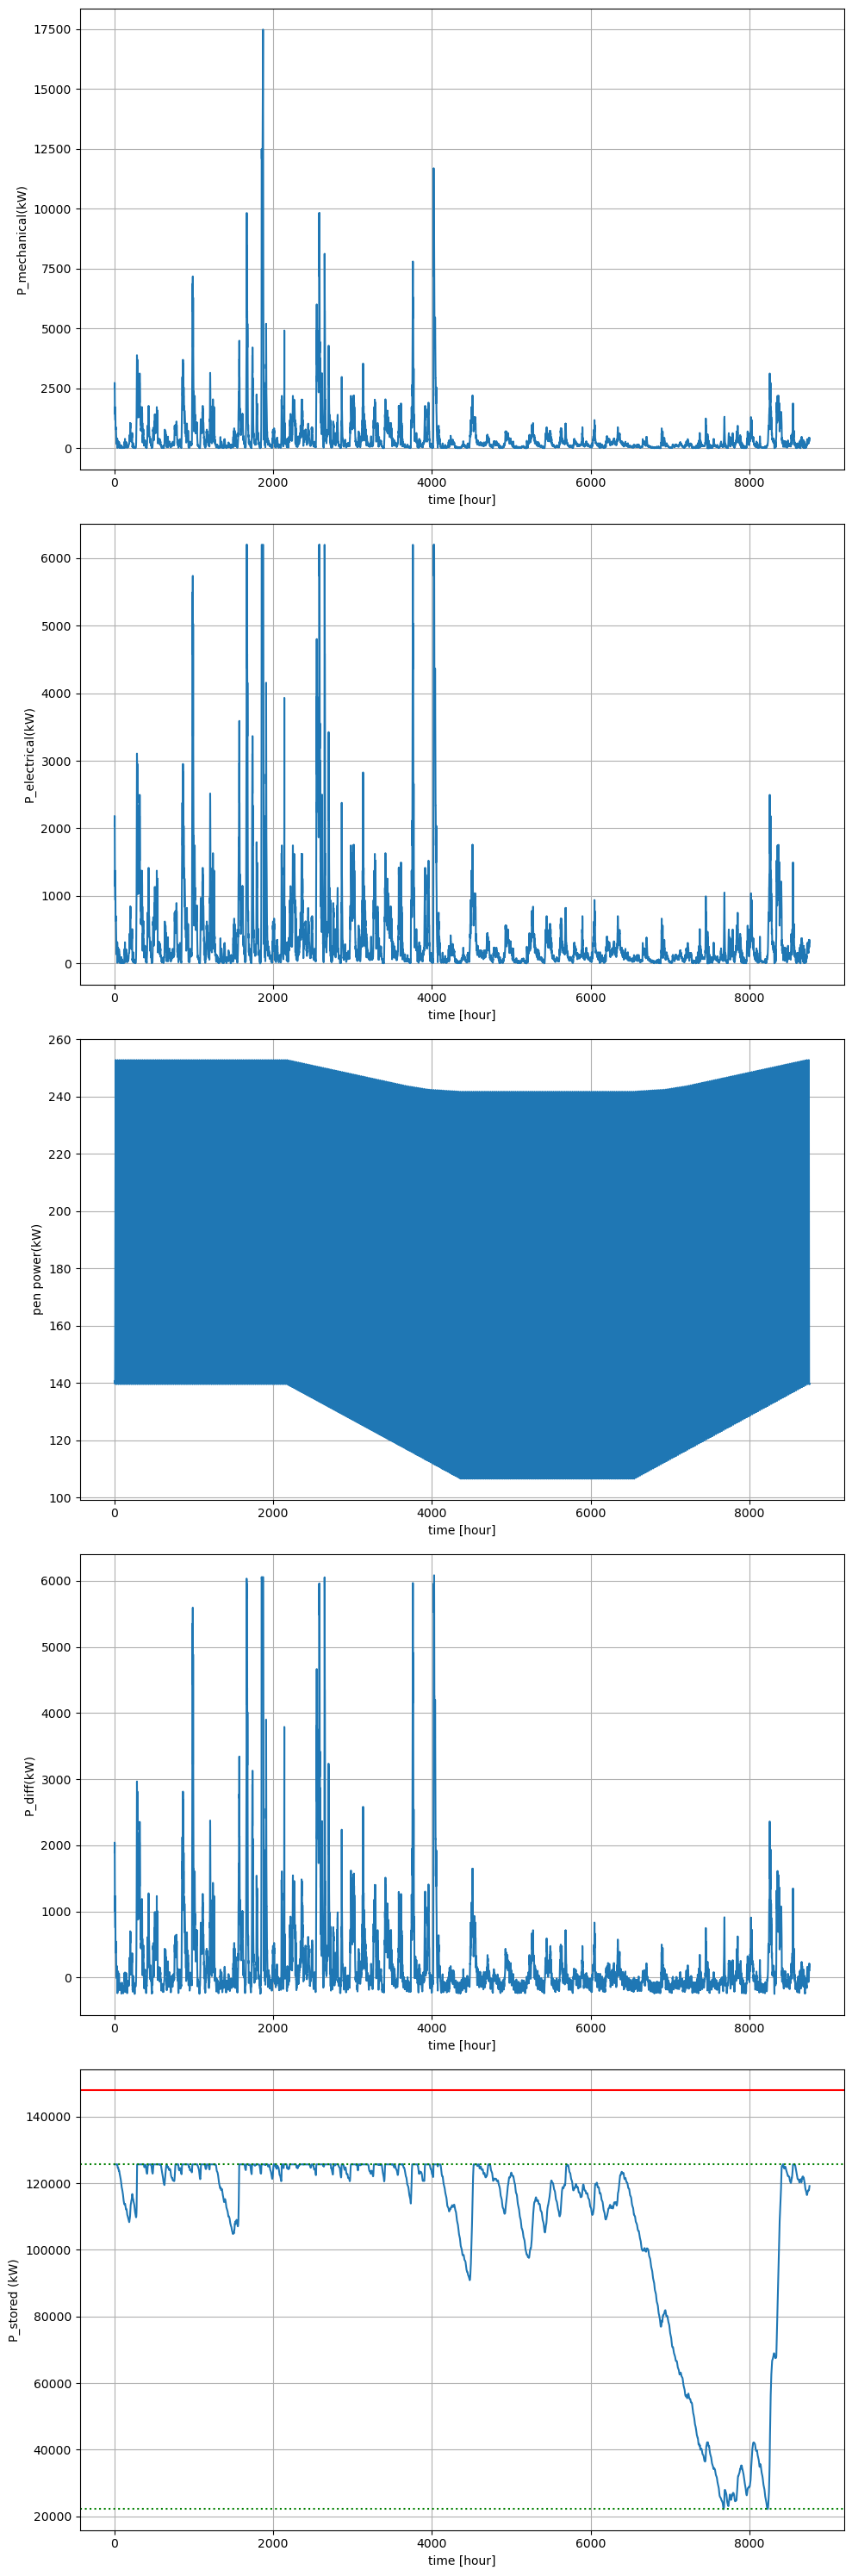

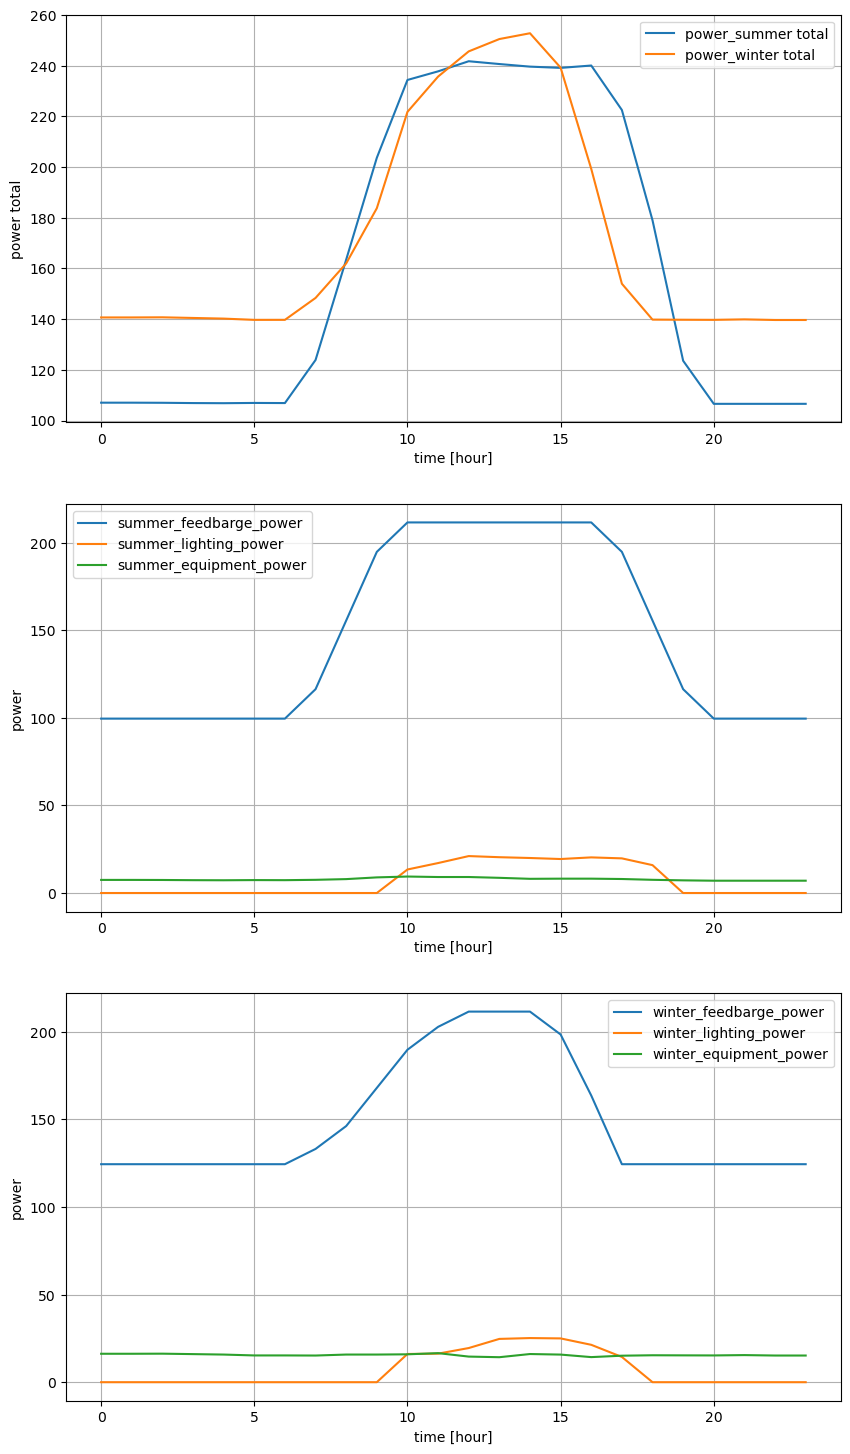

In [3]:
wpaf_opt_obj.plot_power()

# Plot fish growth and fish oxygen demand

DO2 for 1kg fish 504.2788423858458
DO2 for 2kg fish 1174.7045514567676
DO2 for 3kg fish 1885.5099944513904
DO2 for 4kg fish 2592.876196676822
fish weight after 365 days 4216.750932751627


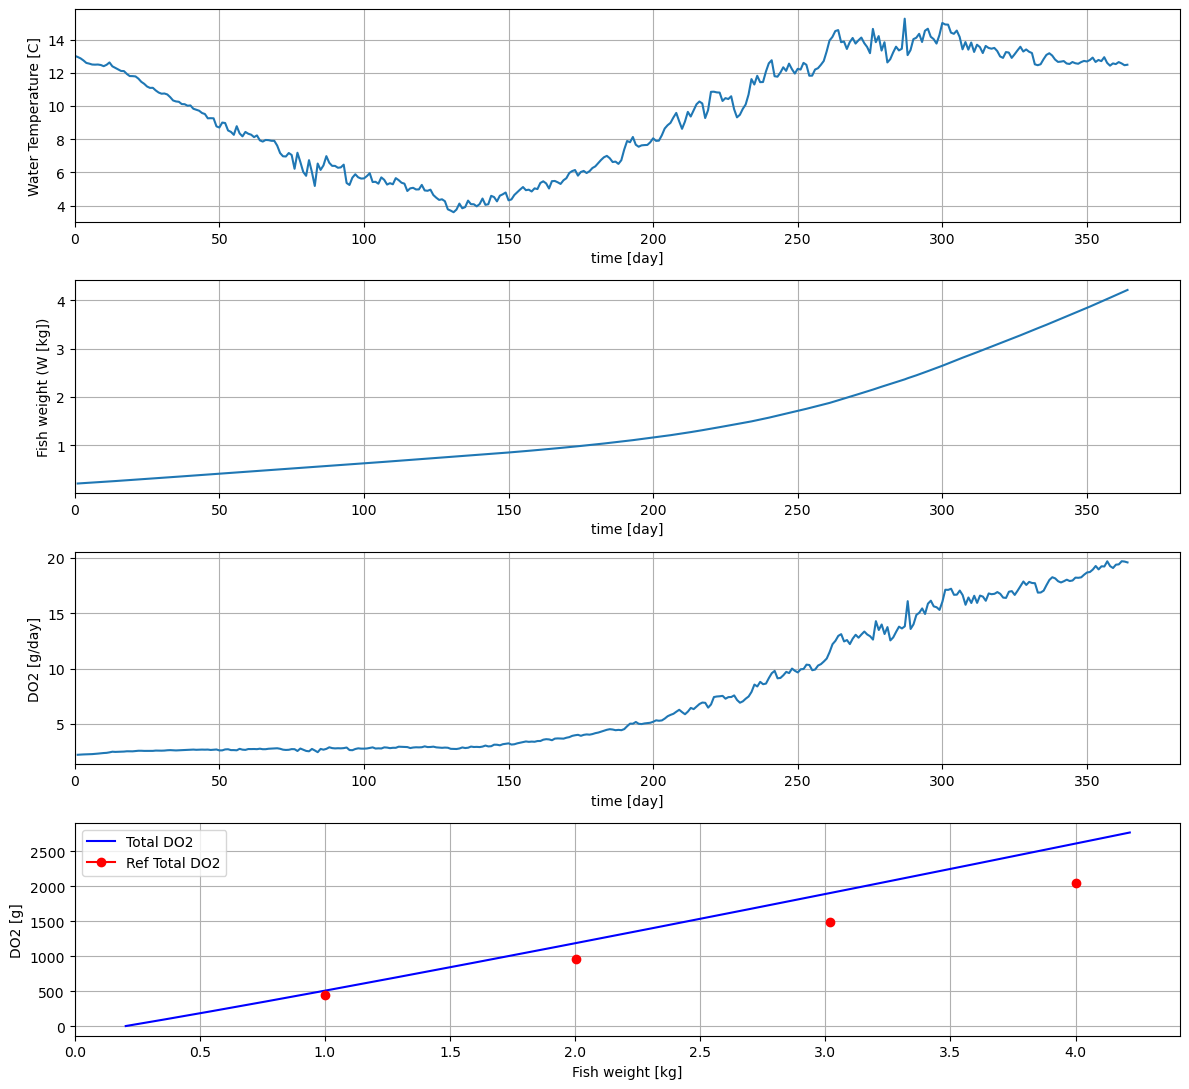

In [4]:
wpaf_opt_obj.plot_variable()

# Single Objective Optimization (NSGA-II)

In [5]:
from wpaf_opt import *

start_time = time.time()
args = {}
args['moo_n_obj'] = 1
x, moo_res_best, p_best, op_obj = wpaf_multi_opt(args_in = args)

print('Execution time:', (time.time() - start_time)/60, 'minutes')

try:
    wpaf_opt_obj = WPAF(moo_res_best.X, x.name, p_best) 
except:
    wpaf_opt_obj = WPAF(moo_res_best.X[0], x.name, p_best) 
print_moo_optimize_result(wpaf_opt_obj, x.list, x.unit, moo_res_best)

Execution time: 121.26014320055644 minutes
optimization success: True
optimal design variable:
   capture_width      67.208 [m]
   pen_diameter       44.982 [m]
   stock_density       6.378 [kg/m^3]
----------------------------------------
optimal objective function terms:
   Objective_func             9.890
   cost per yield             9.890 [$ / kg]
   NPV                      271.344 [Million $]
   levelized fish yield      27.437 [kilo Tonne]
   annual fish yield          3.012 [kilo Tonne]
----------------------------------------
optimal wave energy converter:
   wec number         21.003 [-]
   wec_P_ave          18.033 [kW]
   wec AEP        3319937.629 [kWh]
----------------------------------------
optimal price break down WPAF:
   WPAF NPV                       271.344 [Million $] 100.0 [%]
   |__ wec NPV                    131.632 [Million $]  48.5 [%]
   |   |__ wec CapEx              108.012 [Million $]  39.8 [%]
   |   |__ wec OpEx                23.620 [Million $]   8.7 